In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

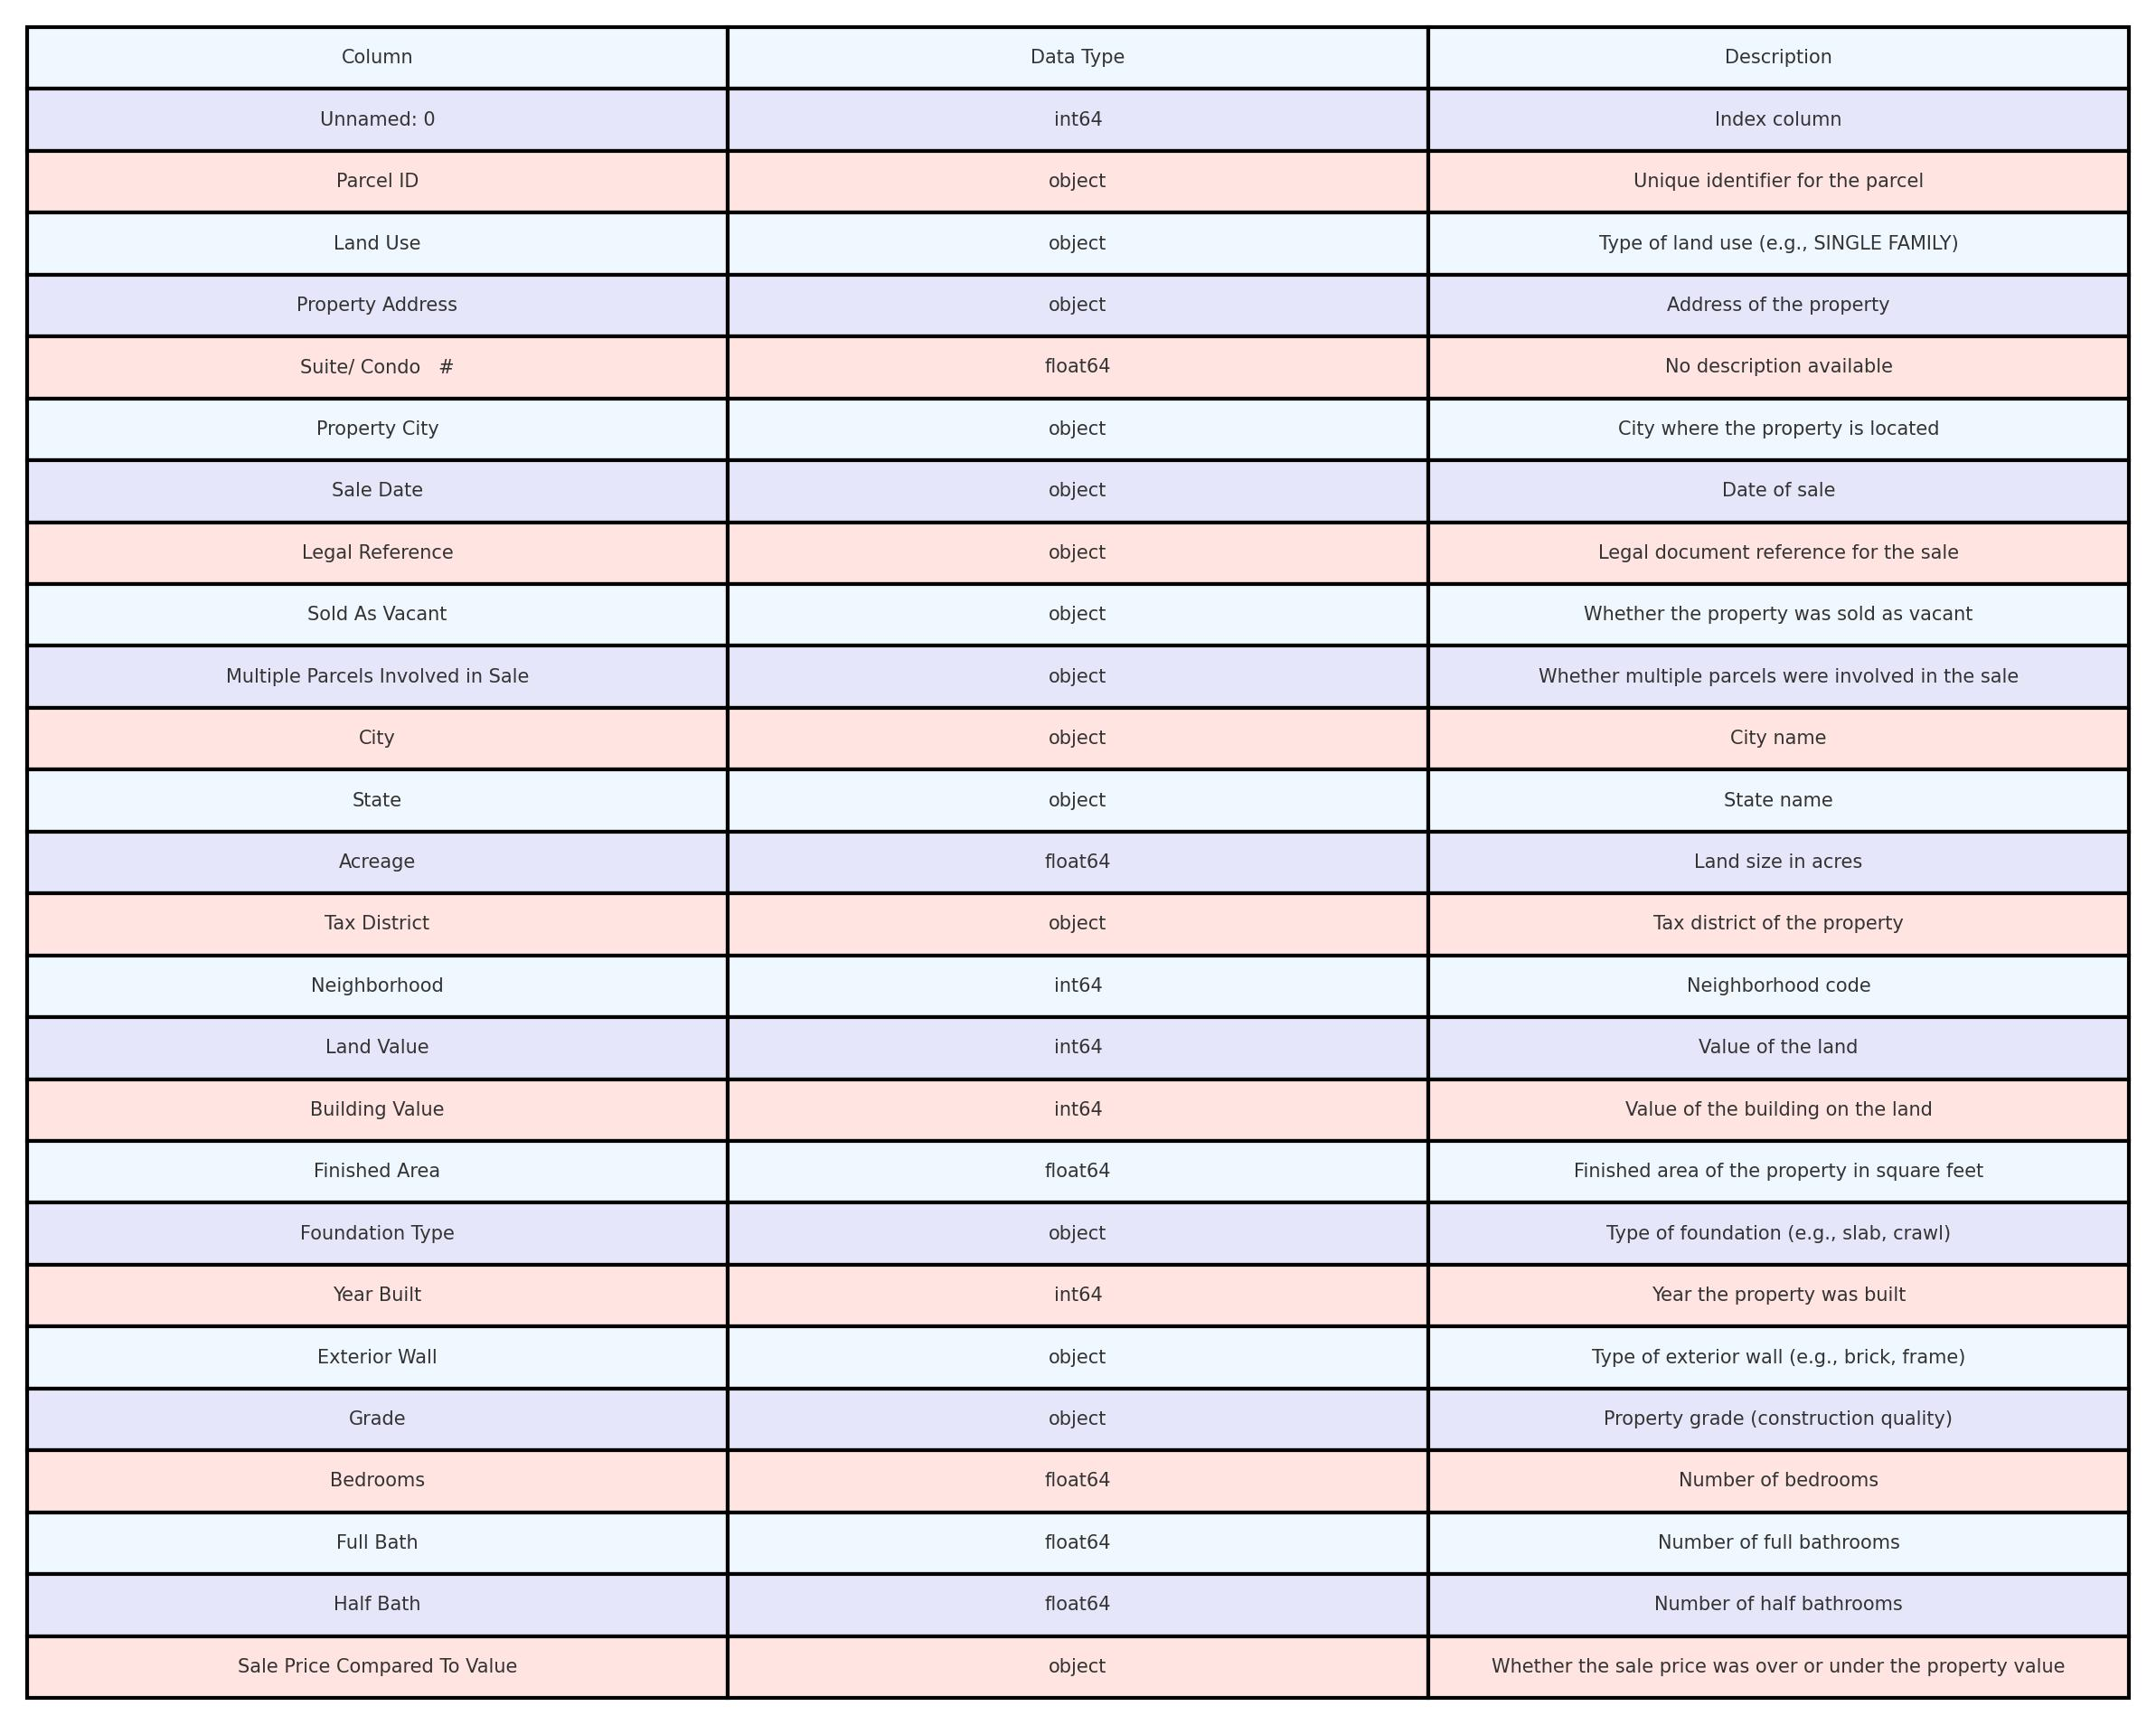

In [2]:
# Import necessary libraries
from IPython.display import Image, display

# Path to the image file
image_path = r"C:\Users\Ebiere\Downloads\nashville_dataset_description_colored.jpg" 

# Display the image
display(Image(filename=image_path))

### Nashville Real Estate Analysis: Predicting Over/Under Valued Properties 🏠
### Goal: Build a model to help a real estate company identify properties that are either over or under-valued based on recent sales data in Nashville.


In [3]:
df = pd.read_csv ("C:/Users/Ebiere/OneDrive/Desktop/ALY6020/week 4 - Nashville_housing_data.csv")


### Undertsanding the dataset

In [4]:
df

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,10/13/2016,20161019-0110290,No,No,...,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,10/26/2016,20161102-0115842,No,No,...,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,10/28/2016,20161031-0114817,No,No,...,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,10/28/2016,20161102-0115988,No,No,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [5]:
df.shape

(22651, 26)

In [6]:
# Check for null values
print('Total Nulls Per Column:')
print(df.isnull().sum())

Total Nulls Per Column:
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                      

In [7]:
print(df.describe())

         Unnamed: 0  Suite/ Condo   #       Acreage  Neighborhood  \
count  22651.000000               0.0  22651.000000  22651.000000   
mean   27889.491192               NaN      0.454705   4432.715024   
std    16598.865706               NaN      0.611818   2142.803595   
min        1.000000               NaN      0.040000    107.000000   
25%    13324.500000               NaN      0.200000   3130.000000   
50%    27712.000000               NaN      0.280000   4026.000000   
75%    42330.500000               NaN      0.460000   6229.000000   
max    56615.000000               NaN     17.500000   9530.000000   

         Land Value  Building Value  Finished Area    Year Built  \
count  2.265100e+04    2.265100e+04   22650.000000  22651.000000   
mean   7.013797e+04    1.722402e+05    1915.377151   1961.947684   
std    1.029035e+05    1.896424e+05    1079.094521     25.843908   
min    9.000000e+02    1.400000e+03     450.000000   1832.000000   
25%    2.200000e+04    8.550000e+04   

In [8]:
df.columns.tolist()

['Unnamed: 0',
 'Parcel ID',
 'Land Use',
 'Property Address',
 'Suite/ Condo   #',
 'Property City',
 'Sale Date',
 'Legal Reference',
 'Sold As Vacant',
 'Multiple Parcels Involved in Sale',
 'City',
 'State',
 'Acreage',
 'Tax District',
 'Neighborhood',
 'Land Value',
 'Building Value',
 'Finished Area',
 'Foundation Type',
 'Year Built',
 'Exterior Wall',
 'Grade',
 'Bedrooms',
 'Full Bath',
 'Half Bath',
 'Sale Price Compared To Value']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

### Part 1: Data Cleaning
### Goal: Clean the dataset to ensure that it is ready for modeling.

In [10]:
# Drop irrelevant columns:
df_cleaned = df.drop(['Unnamed: 0', 'Parcel ID', 'Property Address', 'Legal Reference', 
                      'Suite/ Condo   #', 'Property City'], axis=1)


In [11]:
# Rename columns for better readability
df_cleaned.rename(columns={
    'Sale Price Compared To Value': 'Sale_Price_Compared_To_Value',
    'Land Use': 'Land_Use',
    'Sale Date': 'Sale_Date',
    'Sold As Vacant': 'Sold_As_Vacant',
    'Multiple Parcels Involved in Sale': 'Multiple_Parcels_Involved',
    'Tax District': 'Tax_District',
    'Land Value': 'Land_Value',
    'Building Value': 'Building_Value',
    'Finished Area': 'Finished_Area',
    'Foundation Type': 'Foundation_Type',
    'Year Built': 'Year_Built',
    'Exterior Wall': 'Exterior_Wall',
    'Full Bath': 'Full_Bath',
    'Half Bath': 'Half_Bath'
}, inplace=True)

In [12]:
# checking for missing values
for c in df.columns:
    print('Total Missing values in \'{}\' are {}.'.format(c,df[c].isna().sum()))

Total Missing values in 'Unnamed: 0' are 0.
Total Missing values in 'Parcel ID' are 0.
Total Missing values in 'Land Use' are 0.
Total Missing values in 'Property Address' are 2.
Total Missing values in 'Suite/ Condo   #' are 22651.
Total Missing values in 'Property City' are 2.
Total Missing values in 'Sale Date' are 0.
Total Missing values in 'Legal Reference' are 0.
Total Missing values in 'Sold As Vacant' are 0.
Total Missing values in 'Multiple Parcels Involved in Sale' are 0.
Total Missing values in 'City' are 0.
Total Missing values in 'State' are 0.
Total Missing values in 'Acreage' are 0.
Total Missing values in 'Tax District' are 0.
Total Missing values in 'Neighborhood' are 0.
Total Missing values in 'Land Value' are 0.
Total Missing values in 'Building Value' are 0.
Total Missing values in 'Finished Area' are 1.
Total Missing values in 'Foundation Type' are 1.
Total Missing values in 'Year Built' are 0.
Total Missing values in 'Exterior Wall' are 0.
Total Missing values in 

In [13]:
# Handle missing values
# Fill numerical columns with median values
df_cleaned['Bedrooms'].fillna(df_cleaned['Bedrooms'].median(), inplace=True)
df_cleaned['Full_Bath'].fillna(df_cleaned['Full_Bath'].median(), inplace=True)
df_cleaned['Half_Bath'].fillna(df_cleaned['Half_Bath'].median(), inplace=True)
df_cleaned['Finished_Area'].fillna(df_cleaned['Finished_Area'].median(), inplace=True)


In [14]:
# Fill categorical columns with mode
df_cleaned['Foundation_Type'].fillna(df_cleaned['Foundation_Type'].mode()[0], inplace=True)


In [15]:
# check if missing values have been handled
for c in df_cleaned.columns:
    print('Total Missing values in \'{}\' are {}.'.format(c,df_cleaned[c].isna().sum()))

Total Missing values in 'Land_Use' are 0.
Total Missing values in 'Sale_Date' are 0.
Total Missing values in 'Sold_As_Vacant' are 0.
Total Missing values in 'Multiple_Parcels_Involved' are 0.
Total Missing values in 'City' are 0.
Total Missing values in 'State' are 0.
Total Missing values in 'Acreage' are 0.
Total Missing values in 'Tax_District' are 0.
Total Missing values in 'Neighborhood' are 0.
Total Missing values in 'Land_Value' are 0.
Total Missing values in 'Building_Value' are 0.
Total Missing values in 'Finished_Area' are 0.
Total Missing values in 'Foundation_Type' are 0.
Total Missing values in 'Year_Built' are 0.
Total Missing values in 'Exterior_Wall' are 0.
Total Missing values in 'Grade' are 0.
Total Missing values in 'Bedrooms' are 0.
Total Missing values in 'Full_Bath' are 0.
Total Missing values in 'Half_Bath' are 0.
Total Missing values in 'Sale_Price_Compared_To_Value' are 0.


In [16]:
# Encode categorical target variable
df_cleaned['Sale_Price_Compared_To_Value'] = df_cleaned['Sale_Price_Compared_To_Value'].map({'Over': 1, 'Under': 0})



### Outlier Detection

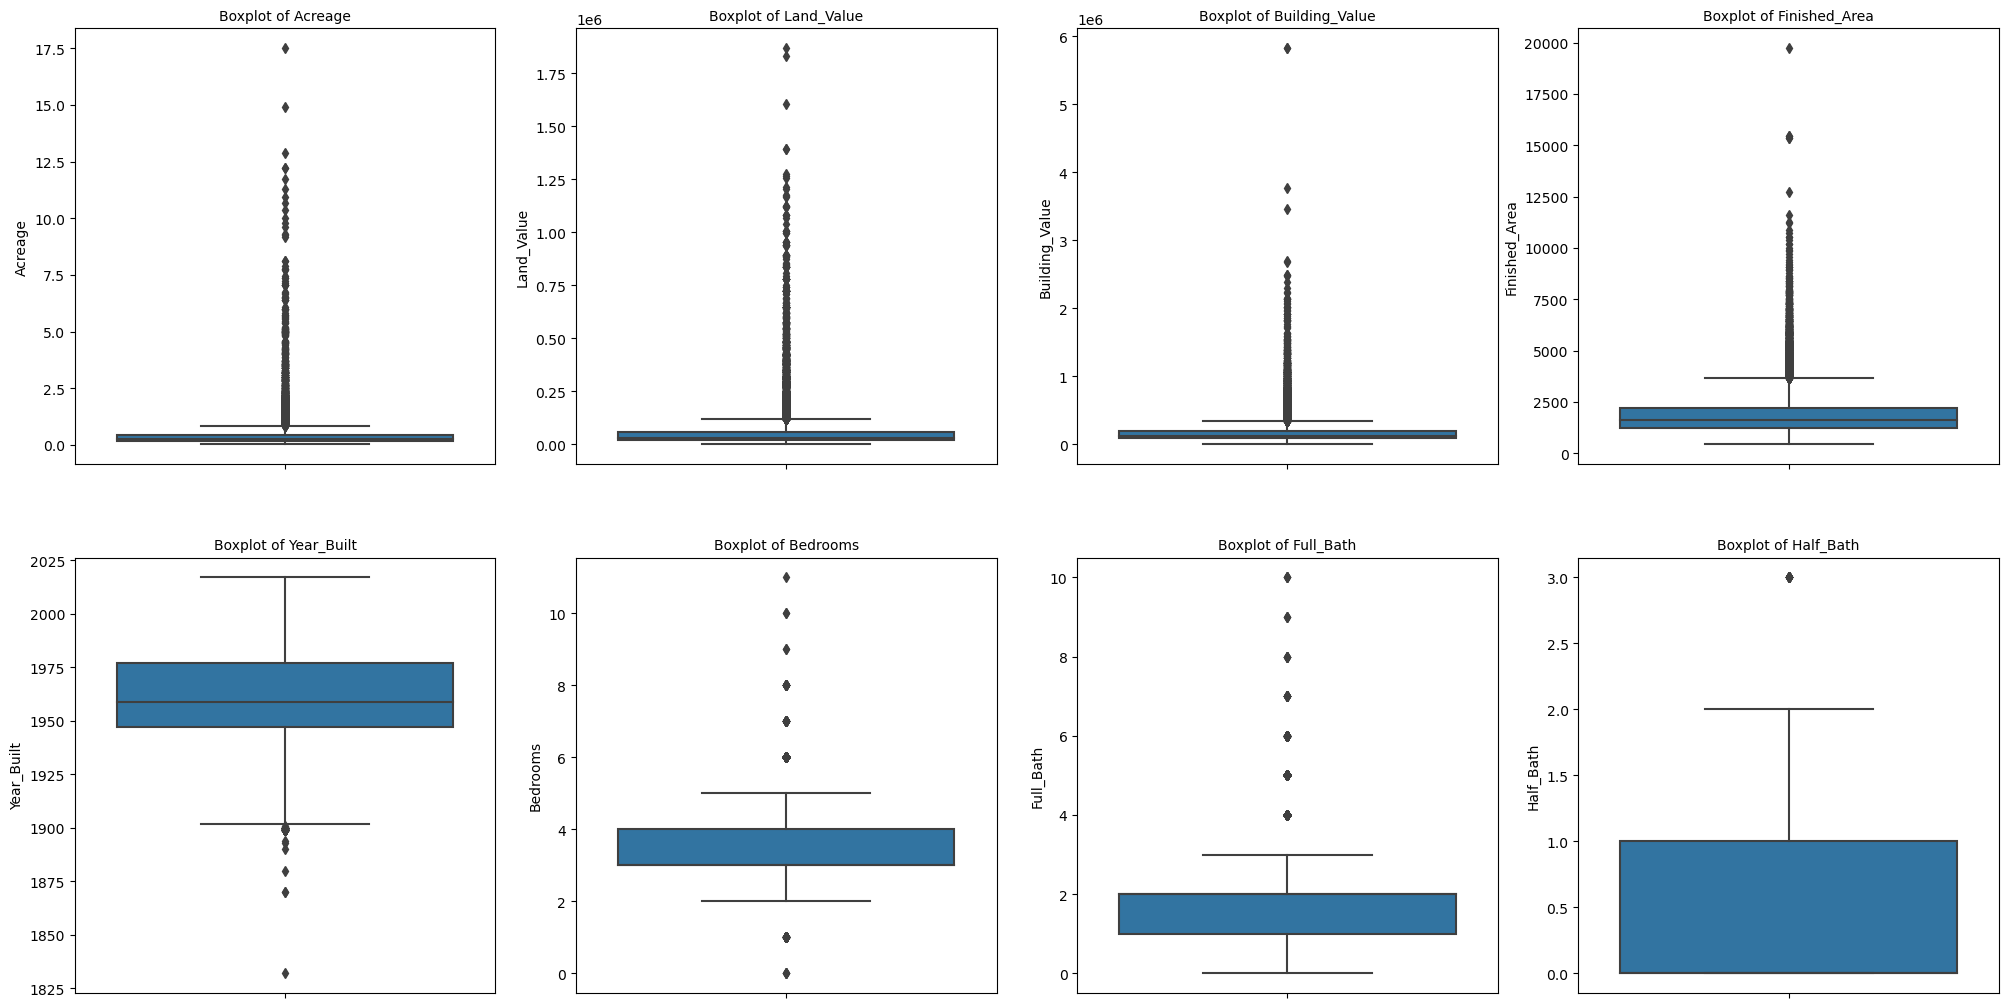

In [17]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()

numeric_columns = ['Acreage', 'Land_Value', 'Building_Value', 'Finished_Area', 'Year_Built', 'Bedrooms', 'Full_Bath', 'Half_Bath']
for index, col in enumerate(numeric_columns):
    sns.boxplot(y=df_cleaned[col], ax=axs[index])
    axs[index].set_title(f'Boxplot of {col}', fontsize=10)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


### Feature Selection

In [18]:
X = df_cleaned[['Acreage', 'Land_Value', 'Building_Value', 'Finished_Area', 'Year_Built', 'Bedrooms', 'Full_Bath', 'Half_Bath']]
y = df_cleaned['Sale_Price_Compared_To_Value']

### Scale Features

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
# RFE using Linear Regression
linear_model = LinearRegression()
rfe = RFE(estimator=linear_model, n_features_to_select=5)
rfe.fit(X_scaled, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [21]:
# Selected features by RFE
selected_rfe_features = X.columns[rfe.support_]
print("Selected features using RFE with Linear Regression:", selected_rfe_features)


Selected features using RFE with Linear Regression: Index(['Acreage', 'Land_Value', 'Building_Value', 'Finished_Area',
       'Full_Bath'],
      dtype='object')


In [22]:
X_rfe = X_scaled[selected_rfe_features]


### Grid of histograms for all numerical columns in df_cleaned

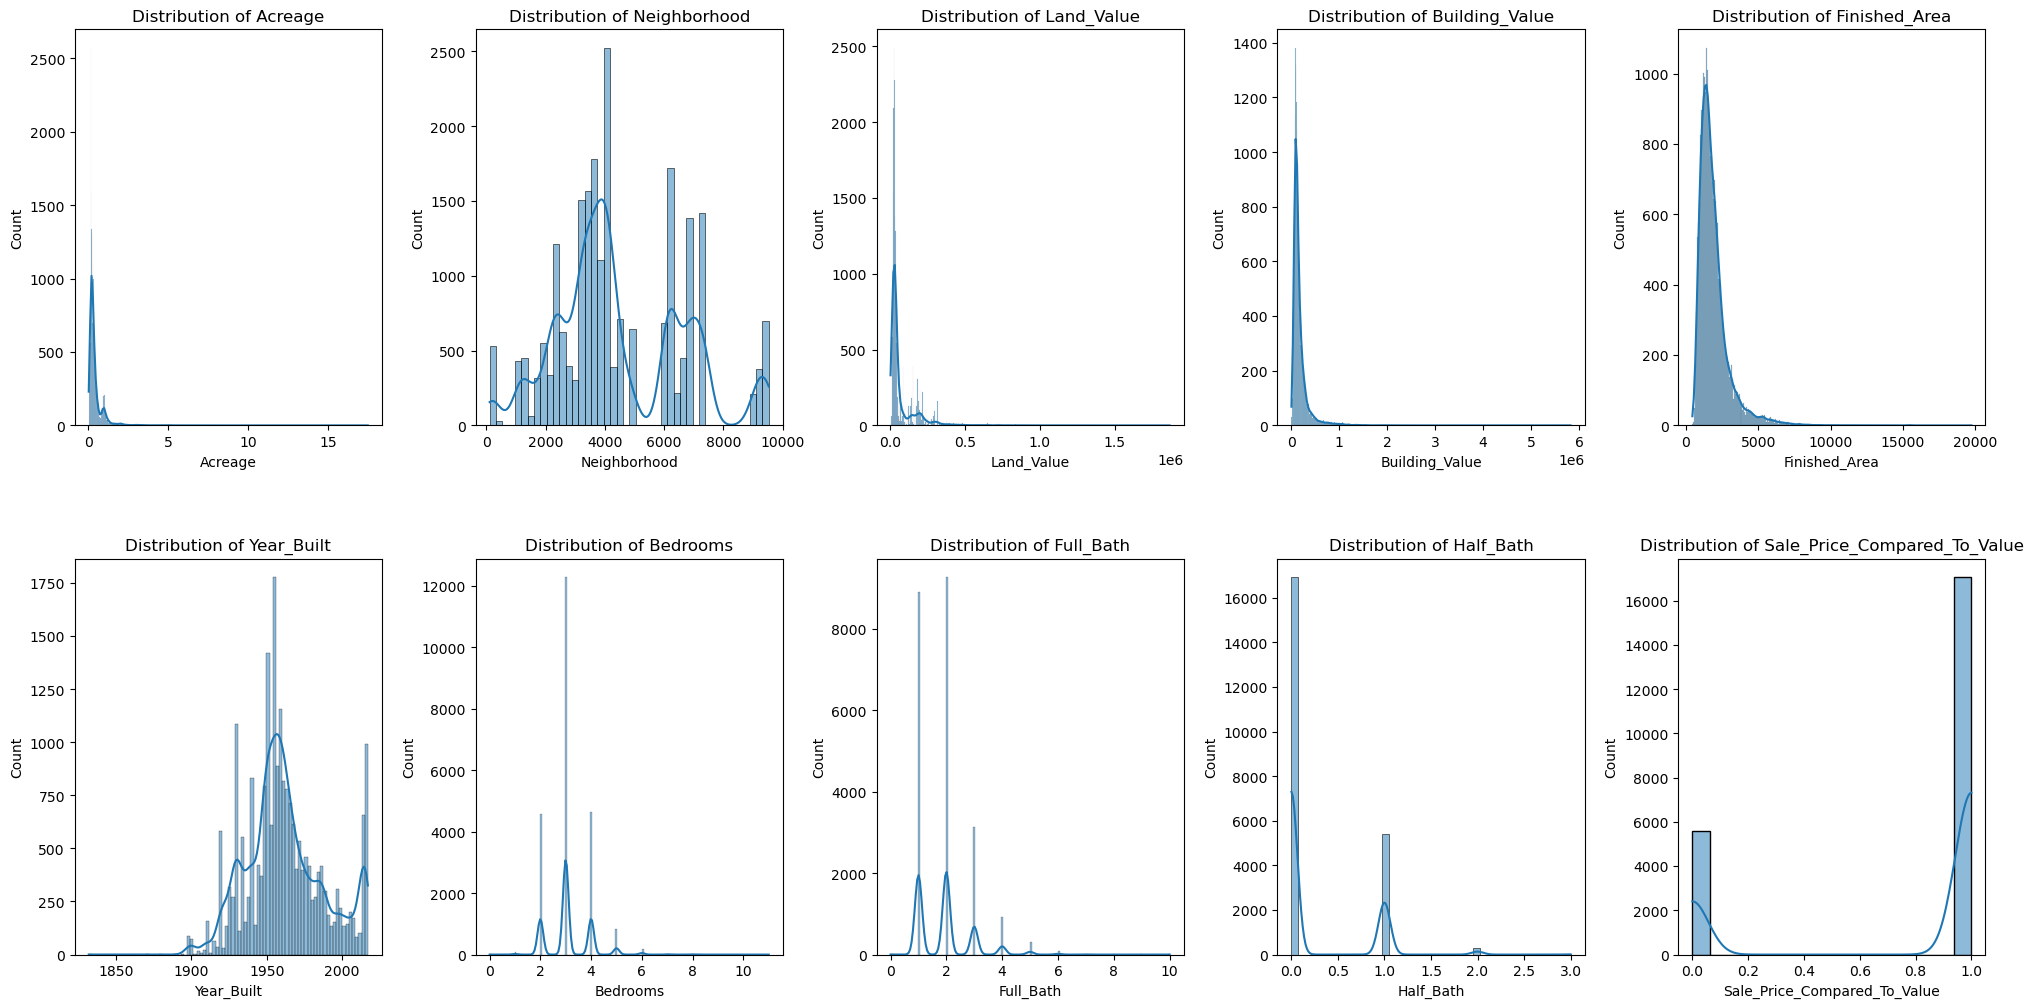

In [23]:
# Set up the figure and axes
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
axs = axs.flatten()

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Iterate through the numerical columns and plot histograms with KDE
for index, col in enumerate(numeric_columns):
    sns.histplot(df_cleaned[col], ax=axs[index], kde=True) 
    axs[index].set_title(f'Distribution of {col}')  

# Remove any unused subplots
for i in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


### Variance Inflation Factor (VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df_cleaned[considered_features]
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['Acreage', 'Land_Value','Building_Value', 'Finished_Area', 'Year_Built', 'Bedrooms', 'Full_Bath', 'Half_Bath']
compute_vif(considered_features).sort_values('VIF', ascending=False)


,Variable,VIF
3,Finished_Area,6.664043
2,Building_Value,3.854465
6,Full_Bath,3.334520
1,Land_Value,2.049604
5,Bedrooms,1.800255
7,Half_Bath,1.435454
0,Acreage,1.298061
4,Year_Built,1.241525


In [25]:
# compute vif values after removing a feature
considered_features.remove('Finished_Area')
compute_vif(considered_features)

,Variable,VIF
0,Acreage,1.213792
1,Land_Value,1.979553
2,Building_Value,2.459365
3,Year_Built,1.239817
4,Bedrooms,1.658969
5,Full_Bath,2.762289
6,Half_Bath,1.356405


### Regression plot

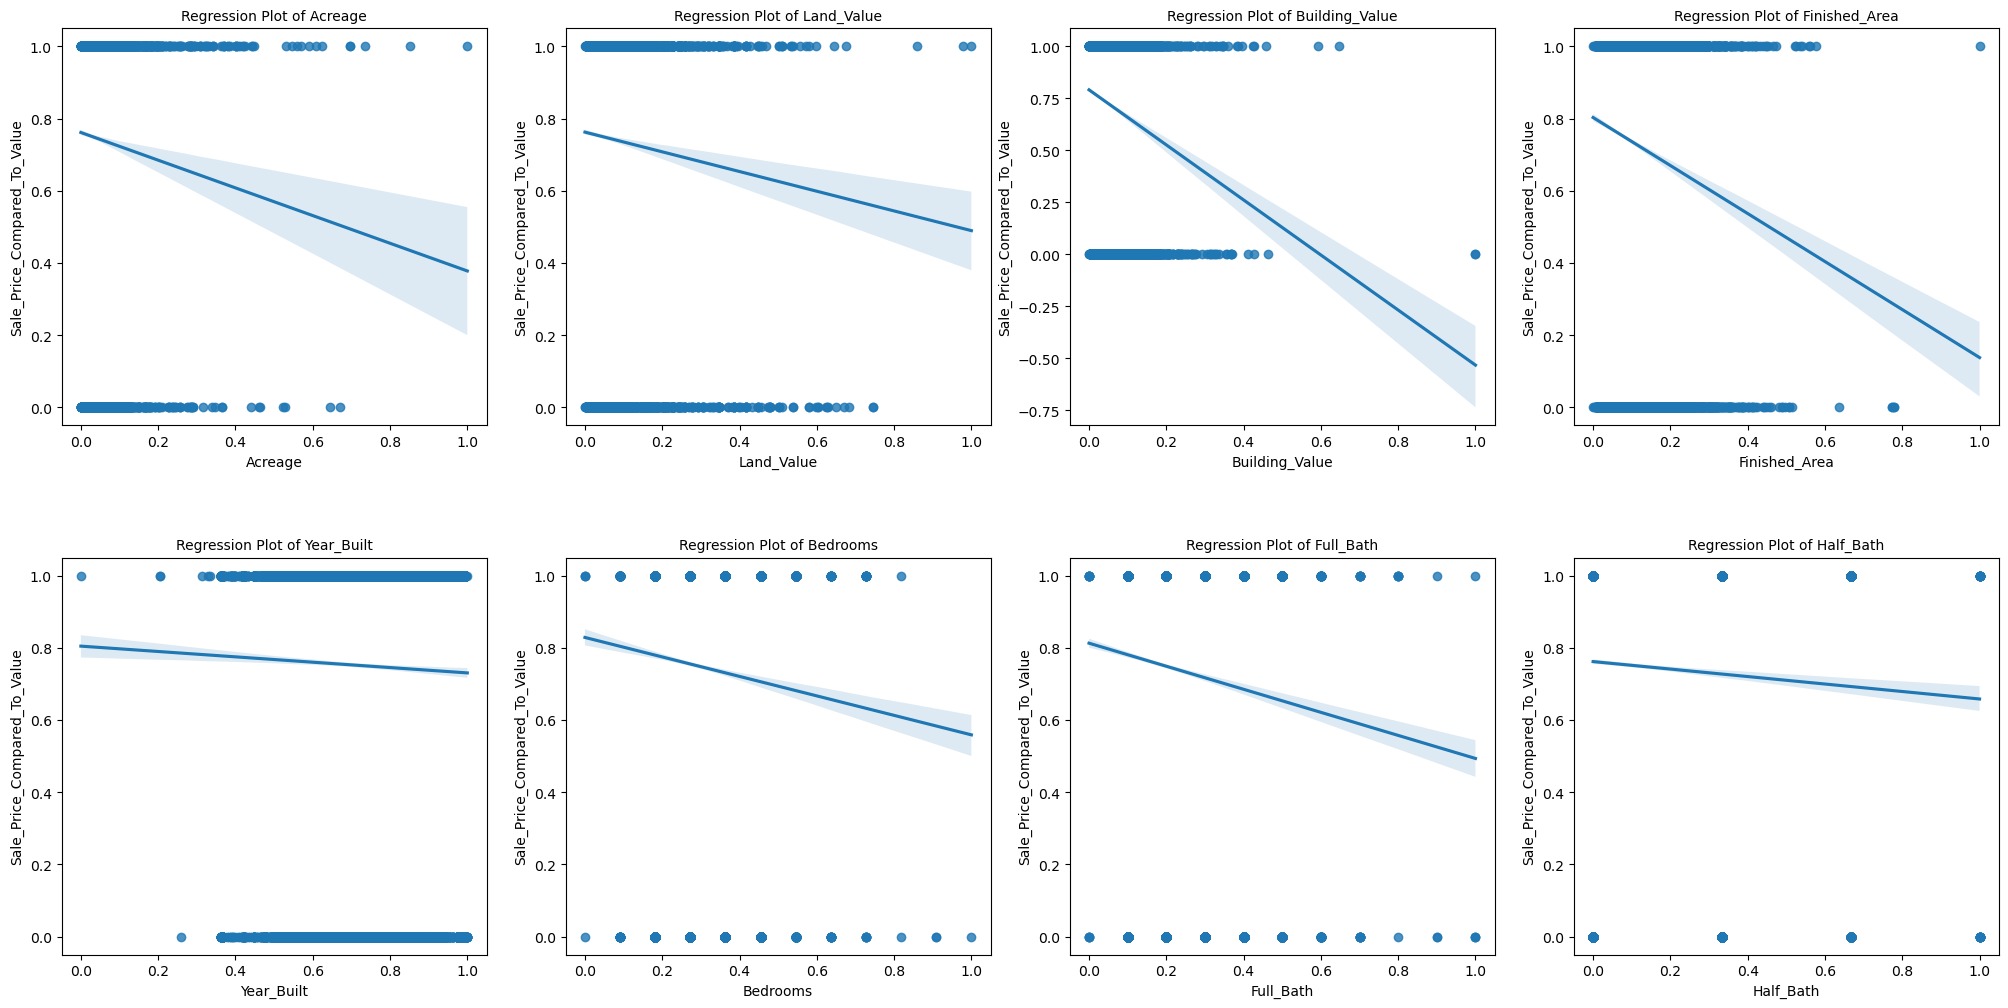

In [26]:
# Set up the figure and axes for regression plots
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Iterate through the scaled features and plot regression plots
for i, col in enumerate(X_scaled.columns):
    sns.regplot(x=X_scaled[col], y=y, ax=axs[i])
    axs[i].set_title(f'Regression Plot of {col}', fontsize=10)

# Adjust layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [27]:
# View the cleaned dataframe
df_cleaned.head()

,Land_Use,Sale_Date,Sold_As_Vacant,Multiple_Parcels_Involved,City,State,Acreage,Tax_District,Neighborhood,Land_Value,Building_Value,Finished_Area,Foundation_Type,Year_Built,Exterior_Wall,Grade,Bedrooms,Full_Bath,Half_Bath,Sale_Price_Compared_To_Value
0,SINGLE FAMILY,1/11/2013,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,1
1,SINGLE FAMILY,1/18/2013,No,No,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,1
2,SINGLE FAMILY,1/18/2013,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,0
3,SINGLE FAMILY,1/23/2013,No,No,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,0
4,SINGLE FAMILY,1/4/2013,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,0


## Splitting

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Model Building ⚙️
### Build and evaluate various models to predict if a property is over/under valued


# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)### Part 2: Linear Regression(for comparison with classifiers)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict and evaluate
y_pred_lr = model.predict(X_test)
r_squared_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [31]:
print("\n### Linear Regression Evaluation ###")
print(f"R-squared: {r_squared_lr:.4f}")
print(f"Mean Squared Error: {mse_lr:.4f}")


### Linear Regression Evaluation ###
R-squared: 0.0126
Mean Squared Error: 0.1859


### A Linear Regression model was built to predict whether properties are over or under-valued. However, Linear Regression is not well-suited for binary classification problems, as seen from the metrics:

### R-squared: 0.0126 (very low)
### Mean Squared Error: 0.1859 (high)
### Conclusion: Linear regression performs poorly for classification tasks like this one. Therefore, it should not be used in this context.

### Part 3: Decision Tree Classifier

In [32]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate the model and print the classification report and confusion matrix.
    Return the classification report as a dictionary.
    """
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    print(f"\nClassification report for {model_name}:\n", classification_report(y_test, predictions))
    print(f"Confusion matrix for {model_name}:\n {confusion_matrix(y_true=y_test, y_pred=predictions)}\n")
    return report

In [34]:
# Evaluate the basic model
dtc_report = evaluate_model(dtc, X_test, y_test, "Basic Decision Tree")


Classification report for Basic Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.01      0.02      1709
           1       0.75      1.00      0.86      5087

    accuracy                           0.75      6796
   macro avg       0.71      0.51      0.44      6796
weighted avg       0.73      0.75      0.65      6796

Confusion matrix for Basic Decision Tree:
 [[  21 1688]
 [  10 5077]]



In [35]:
## Hyperparameter Tuning with RandomizedSearchCV
## We decided to optimize the model’s performance.

# Import RandomizedSearchCV for tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None], 
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree and RandomizedSearchCV
dtc_tuned = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), 
                               param_distributions=param_grid, n_iter=10, 
                               cv=5, random_state=42, n_jobs=-1)

# Train and evaluate the tuned model
dtc_tuned.fit(X_train, y_train)
tuned_dtc_report = evaluate_model(dtc_tuned, X_test, y_test, "Tuned Decision Tree")




Classification report for Tuned Decision Tree:
               precision    recall  f1-score   support

           0       0.49      0.04      0.07      1709
           1       0.75      0.99      0.85      5087

    accuracy                           0.75      6796
   macro avg       0.62      0.51      0.46      6796
weighted avg       0.69      0.75      0.66      6796

Confusion matrix for Tuned Decision Tree:
 [[  60 1649]
 [  62 5025]]



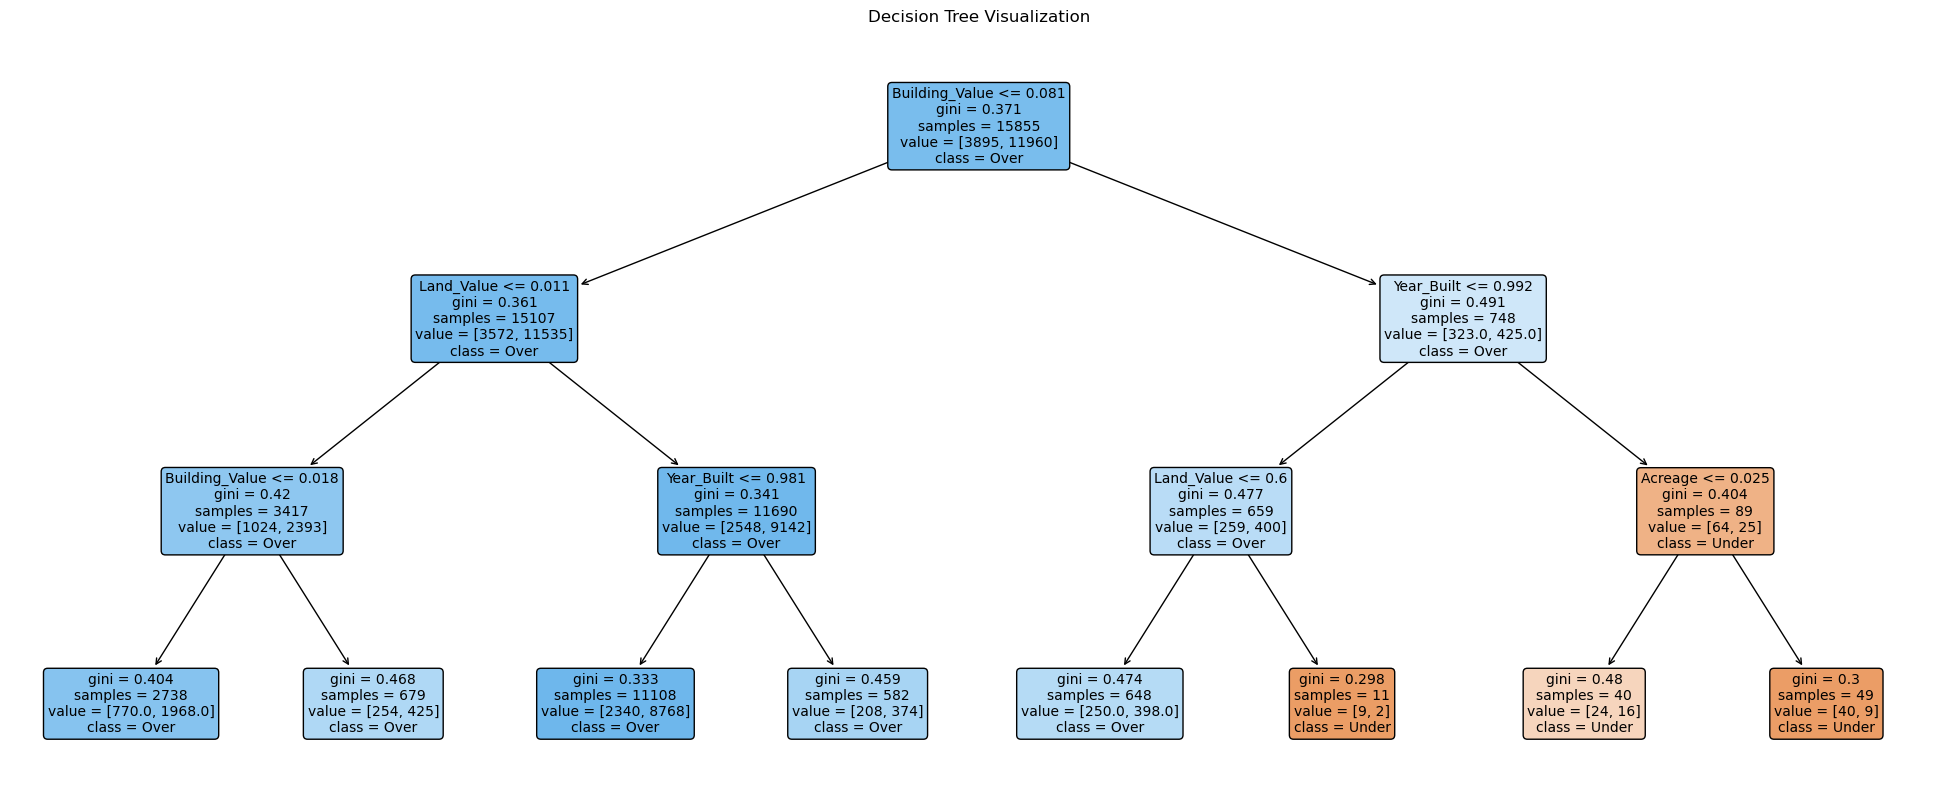

In [36]:
from sklearn import tree  # Import the tree module
import matplotlib.pyplot as plt

# Plot the decision tree using the correct model reference
plt.figure(figsize=(25, 10))  
tree.plot_tree(dtc,
               feature_names=X_train.columns.values.tolist(), 
               class_names=['Under', 'Over'], 
               filled=True,  
               rounded=True,  
               fontsize=10)  
plt.title("Decision Tree Visualization") 
plt.show()


### A Decision Tree Classifier was built to predict over/under-valued properties.

### Default model performance:Accuracy: 0.75, F1-score for over-valued properties: 0.86 (good performance for over-valued properties), Recall for under-valued properties: 0.01 (very poor).
### Confusion matrix: Shows that many under-valued properties are misclassified as over-valued.
### To improve this, hyperparameter tuning was performed using RandomizedSearchCV, which led to better precision but still struggled with recall for under-valued properties.

### Conclusion: The Decision Tree model (both default and tuned) focuses heavily on over-valued properties, making it suboptimal for detecting under-valued properties.








### Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Part 4: Random Forest Classifier

In [38]:
# Assuming 'rfc' is your Random Forest model
rf_report = evaluate_model(rfc, X_test, y_test, "Random Forest")



Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.32      0.13      0.18      1709
           1       0.76      0.91      0.83      5087

    accuracy                           0.71      6796
   macro avg       0.54      0.52      0.50      6796
weighted avg       0.65      0.71      0.66      6796

Confusion matrix for Random Forest:
 [[ 215 1494]
 [ 463 4624]]



In [39]:
# Import RandomizedSearchCV and RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest and RandomizedSearchCV
rfc_tuned = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_grid, n_iter=10, 
                               cv=5, random_state=42, n_jobs=-1)

# Train and evaluate the tuned Random Forest model
rfc_tuned.fit(X_train, y_train)
tuned_rfc_report = evaluate_model(rfc_tuned, X_test, y_test, "Tuned Random Forest")




Classification report for Tuned Random Forest:
               precision    recall  f1-score   support

           0       0.49      0.04      0.08      1709
           1       0.75      0.99      0.85      5087

    accuracy                           0.75      6796
   macro avg       0.62      0.51      0.46      6796
weighted avg       0.69      0.75      0.66      6796

Confusion matrix for Tuned Random Forest:
 [[  70 1639]
 [  74 5013]]



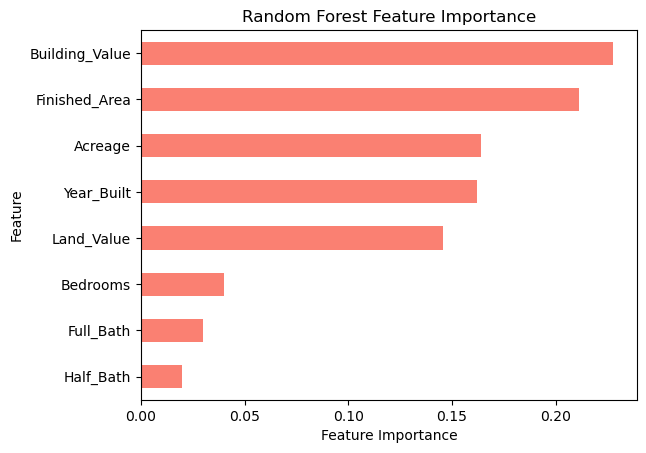

In [40]:
# Feature Importance
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='salmon')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#### A Random Forest Classifier was built to predict over/under-valued properties:

### Default model performance: Accuracy: 0.71, Precision: 0.76 (strong performance for over-valued properties),., Recall: 0.91 for over-valued but poor for under-valued properties.
### After tuning with RandomizedSearchCV, the tuned Random Forest showed better performance but still misclassified under-valued properties, indicating it struggled with detecting those.

### Conclusion:Random Forest performed better than the Decision Tree but still had issues with recall for under-valued properties, though it performed very well in identifying over-valued properties.



### Part 5: Gradient Boosting Classifier

In [41]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data (this is the fitting step)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [42]:
# Evaluate the default Gradient Boosting model
gbc_report = evaluate_model(gbc, X_test, y_test, "Default Gradient Boosting")



Classification report for Default Gradient Boosting:
               precision    recall  f1-score   support

           0       0.52      0.03      0.06      1709
           1       0.75      0.99      0.86      5087

    accuracy                           0.75      6796
   macro avg       0.64      0.51      0.46      6796
weighted avg       0.70      0.75      0.66      6796

Confusion matrix for Default Gradient Boosting:
 [[  54 1655]
 [  49 5038]]



In [ ]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 500],      
    'learning_rate': [0.01, 0.05, 0.1],   
    'max_depth': [3, 4, 5],               
    'subsample': [0.8, 1.0],              
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Use RandomizedSearchCV to tune the model
gbc_tuned = RandomizedSearchCV(gbc, param_distributions=param_grid, n_iter=10, 
                               cv=5, random_state=42, n_jobs=-1)

# Train and evaluate the tuned Gradient Boosting model
gbc_tuned.fit(X_train, y_train)
tuned_gbc_report = evaluate_model(gbc_tuned, X_test, y_test, "Tuned Gradient Boosting")


### A Gradient Boosting Classifier was built to predict over/under-valued properties:

### Default model performance: Accuracy: 0.75, Precision: 0.75, Recall: 0.99 (very good for over-valued properties but poor for under-valued). After hyperparameter tuning using RandomizedSearchCV, the tuned Gradient Boosting model showed slight improvements in precision and recall but continued to heavily focus on over-valued properties.
### Conclusion: Gradient Boosting showed the best overall performance, providing good precision and recall for over-valued properties. However, it still struggled with under-valued properties.



### Part 6: Model Comparison and Recommendation

In [ ]:
import pandas as pd

# Create a dictionary to hold the model performance data
model_data = {
    'Model': ['Default Decision Tree', 'Tuned Decision Tree', 'Default Random Forest', 
              'Tuned Random Forest', 'Default Gradient Boosting', 'Tuned Gradient Boosting'],
    'Accuracy': [0.75, 0.75, 0.71, 0.75, 0.75, 0.75],
    'Precision (Over)': [0.75, 0.75, 0.76, 0.75, 0.75, 0.75],
    'Recall (Over)': [0.998, 0.99, 0.91, 0.99, 0.99, 0.99],
    'F1 Score (Over)': [0.856, 0.85, 0.82, 0.85, 0.86, 0.86],
    'Recall (Under)': [0.01, 0.04, 0.13, 0.04, 0.03, 0.04],
    'F1 Score (Under)': [0.02, 0.07, 0.18, 0.08, 0.06, 0.07]
}

# Create a DataFrame from the dictionary
model_comparison_df = pd.DataFrame(model_data)

# Display the table
print(model_comparison_df)


### Key Findings:
### Decision Tree: Very good at predicting over-valued properties, but consistently fails to classify under-valued properties.
### Random Forest: Performs slightly better than Decision Tree but still has issues with recall for under-valued properties.
### Gradient Boosting: The best performing model overall, with the highest precision and recall for over-valued properties.

### Recommendation:The Tuned Gradient Boosting Classifier is the recommended model for the real estate company. It provides a strong balance between precision and recall, particularly for identifying over-valued properties. Though it struggles with under-valued properties, its overall performance and stability make it the best option for the task. However, if identifying under-valued properties becomes a priority, additional strategies (such as resampling) may need to be explored.

